In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd 
from sklearn.cluster import KMeans

In [2]:
#load dataset
data=pd.read_csv("Mall_Customers.csv")

In [4]:
#iloc to extract the features from the dataset

x=data.iloc[:,3:].values

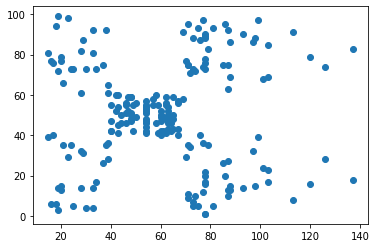

In [6]:
#plot the data among these two features
plt.scatter(x[:,0],x[:,1])

In [9]:
#to find the number of clusters WCSS(inertia) where we plot the elbow graph

WCSS=[]
for i in range(1,11):  #trail and error
    k=KMeans(n_clusters=i,init="k-means++",random_state=0)
    k.fit(x)
    WCSS.append(k.inertia_)
    
WCSS

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37239.83554245604,
 30273.394312070042,
 25018.576334776335,
 21850.165282585633,
 19664.685196005543]

Text(0, 0.5, 'WCSS')

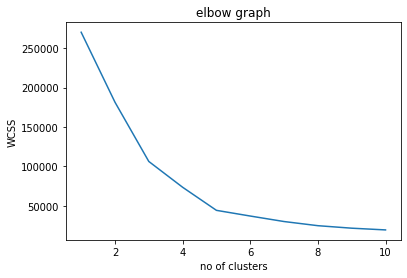

In [10]:
#plot the graph by taking iteration values and WCSS
plt.plot(range(1,11),WCSS)
#plt.scatter(range),WCSS,c='r'
plt.title("elbow graph")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")

### by looking in to the elnow graph the actual clusters we requried k=5

In [11]:
# let us find which datapoint belong to which cluster
k=KMeans(n_clusters=5,init="k-means++",random_state=0)
y=k.fit_predict(x)  #load data to predict the cluster for the datapoint
y

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [12]:
#positions of the centroids
k.cluster_centers_

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

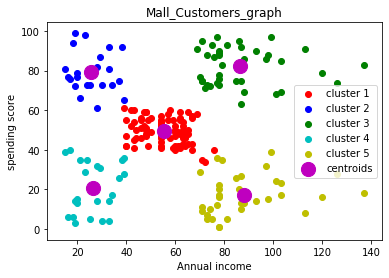

In [15]:
#plot the final graph

plt.scatter(x[y==0,0],x[y==0,1],c='r',label='cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],c='b',label='cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],c='g',label='cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],c='c',label='cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],c='y',label='cluster 5')
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],s=200,c="m",label="centroids")
plt.title("Mall_Customers_graph")
plt.xlabel("Annual income")
plt.ylabel("spending score")
plt.legend()
plt.show()

# interpretation of the graph

* cluster 4:Less salary and less spending score
* cluster 2:Less salary and high spending score
* cluster 1:average salary and average spending score
* cluster 3:high salary and high spending score(these people may provided discounts,offers)
* cluster 5:high salary and less spending score(these people may provided discounts,offers)

# end of program 3